На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов: \
В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные \
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый\
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

Задания:
1. Выберите метод, который предположительно подойдет в первом вопросе.
2. Проверьте, являются ли дисперсии внутри групп гомогенными.
3. Проведите тест на нормальность распределения.
4. Сравните средние в представленных группах.
5. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
6. Примите решение: какие картинки в итоге будем использовать?
7. Выберите метод для второго теста.
8. Визуализируйте распределение events для контрольной и тестовой групп. 
9. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
10. Выберите формулу для модели, проведите тест.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [26]:
sns.set(
    style='whitegrid',
    rc={'figure.figsize':(20, 8)})

1. Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

- A – прямоугольные 16:9
- B – квадратные
- C – прямоугольные 12:4

Каким статистическим тестом нужно воспользоваться для сравнения средних в данном случае?

anova_lm

2. Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными)

In [5]:
exp1 = pd.read_csv('./5_task_1.csv')
exp1.head()

id group  events
0  16046     A      14
1  18712     A      41
2   3268     A      30
3  22633     A      37
4  28071     A      38

In [11]:
a_gr = exp1.query('group == "A"').events

In [15]:
b_gr = exp1.query('group == "B"').events

In [13]:
c_gr = exp1.query('group == "C"').events

In [16]:
ss.levene(a_gr, b_gr, c_gr)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Дисперсии внутри групп примерно одинаковыми (гомогенны)

3. Проведите тест на нормальность распределения.

In [17]:
ss.shapiro(a_gr.sample(1000, random_state=17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [18]:
ss.shapiro(b_gr.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [19]:
ss.shapiro(c_gr.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

Распределения events во всех группах является нормальным

4. Сравните средние в представленных группах.

In [20]:
ss.f_oneway(a_gr, b_gr, c_gr)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Для сравнения средних я использую однофакторный дисперсионный анализ (f_oneway). Значение статистики равно (окр. до целого) 
2886, а р-уровень значимости составил 0.0 (стат значимые различия между группами есть)

5. Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия

Между всеми группами есть статически значимые различия (см. столбец reject)

In [24]:
print(pairwise_tukeyhsd(exp1.events, exp1.group).summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


6. Примите решение: какие картинки в итоге будем использовать?

Text(0, 0.5, 'Число покупок')

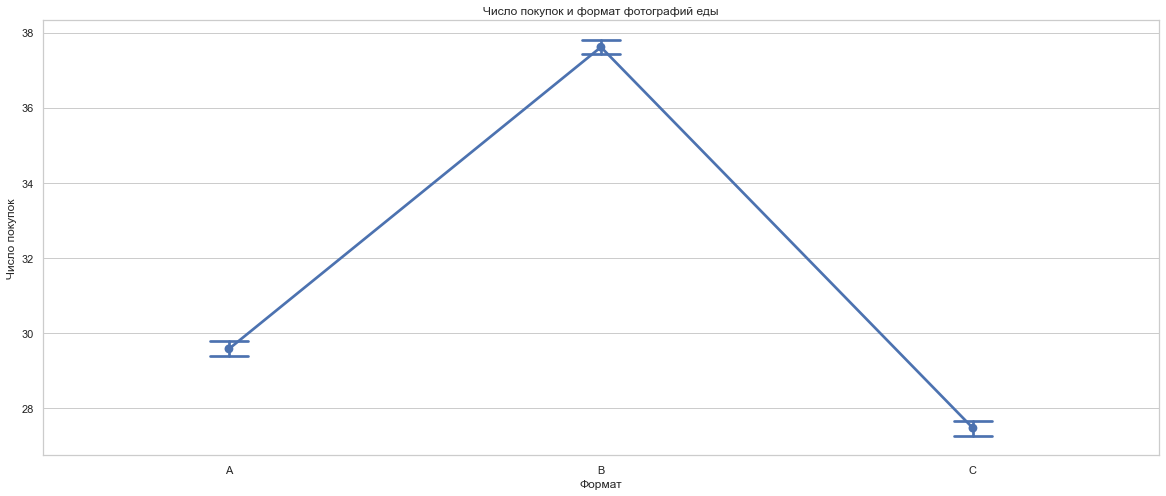

In [34]:
sns.pointplot(x='group', y='events', data=exp1, capsize= .1)
plt.title('Число покупок и формат фотографий еды')
plt.xlabel('Формат')
plt.ylabel('Число покупок')

Будем использовать B - квадратные, потому что среднее больше и статистически значимо отличается от А и С

7. Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

Какой метод скорее всего пригодится в данном случае?

In [35]:
exp2 = pd.read_csv('./5_task_2.csv')
exp2.head()

id group segment  events
0  83440  test    high    78.0
1  96723  test    high    71.0
2  68719  test    high    80.0
3  50399  test    high    80.0
4  95613  test    high    78.0

In [40]:
exp2[['group', 'segment']].value_counts()

group    segment
control  low        40000
test     low        40000
control  high       10000
test     high       10000
dtype: int64

Многофакторный дисперсионный анализ

8. Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='events'>

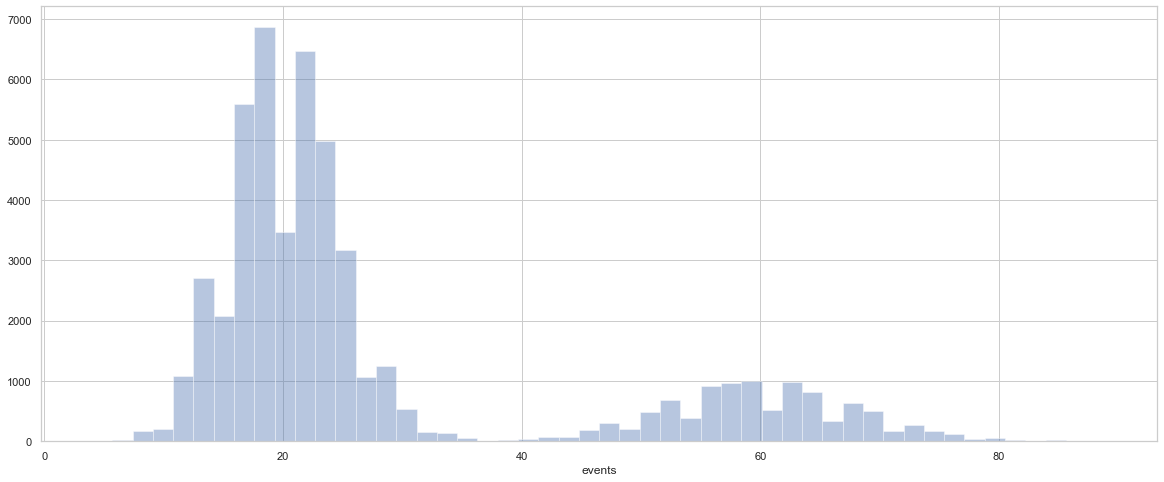

In [46]:
sns.distplot(exp2.query('group == "control"').events, kde=False)

<AxesSubplot:xlabel='events'>

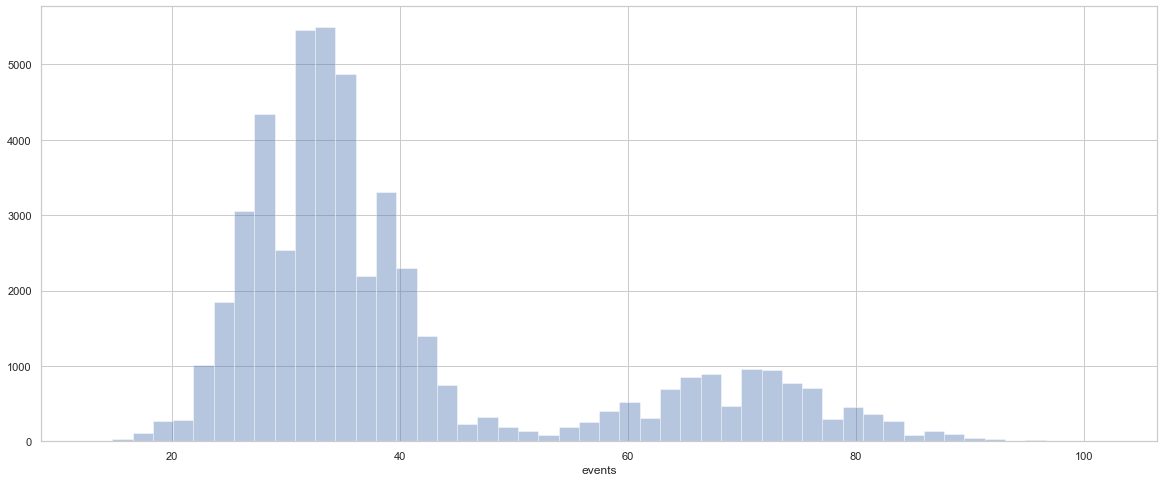

In [47]:
sns.distplot(exp2.query('group == "test"').events, kde=False)

9. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя.

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после запятой

In [58]:
columns = ['mean', 'median', 'std']

In [71]:
exp2.groupby(['group', 'segment']) \
    .agg({'events': ['mean', 'median', 'std']})

events                 
                      mean median       std
group   segment                            
control high     59.970800   60.0  7.805347
        low      20.031575   20.0  4.473576
test    high     69.938500   70.0  8.403974
        low      33.025925   33.0  5.720845

In [76]:
exp2.groupby(['group', 'segment']).events.describe().T.round(2)

group     control                test          
segment      high       low      high       low
count    10000.00  40000.00  10000.00  40000.00
mean        59.97     20.03     69.94     33.03
std          7.81      4.47      8.40      5.72
min         31.00      4.00     40.00     13.00
25%         55.00     17.00     64.00     29.00
50%         60.00     20.00     70.00     33.00
75%         65.00     23.00     76.00     37.00
max         89.00     41.00    102.00     59.00

10. Выберите формулу для модели, проведите тест.

In [77]:
formula = 'events ~ segment + group + segment:group'

Проведите тест, а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [81]:
model = smf.ols(formula, exp2).fit()

In [82]:
aov_table = anova_lm(model, typ=2)

In [85]:
print(aov_table)

                     sum_sq       df              F         PR(>F)
segment        2.362480e+07      1.0  689756.377486   0.000000e+00
group          3.837195e+06      1.0  112031.864120   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN


In [86]:
exp2['combination'] = exp2.group + ' / ' + exp2.segment

In [87]:
exp2.head()

id group segment  events  combination
0  83440  test    high    78.0  test / high
1  96723  test    high    71.0  test / high
2  68719  test    high    80.0  test / high
3  50399  test    high    80.0  test / high
4  95613  test    high    78.0  test / high

In [88]:
print(pairwise_tukeyhsd(exp2.events, exp2.combination).summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control / high control / low -39.9392 0.001 -40.1073 -39.7711   True
control / high   test / high   9.9677 0.001   9.7551  10.1803   True
control / high    test / low -26.9449 0.001  -27.113 -26.7768   True
 control / low   test / high  49.9069 0.001  49.7388   50.075   True
 control / low    test / low  12.9944 0.001   12.888  13.1007   True
   test / high    test / low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


Для обоих сегментов показатели статистически значимо увеличились по сравнению с контрольной группой\
Разница между control/high и test/high составила около 10\
Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13

Text(0, 0.5, 'Число покупок')

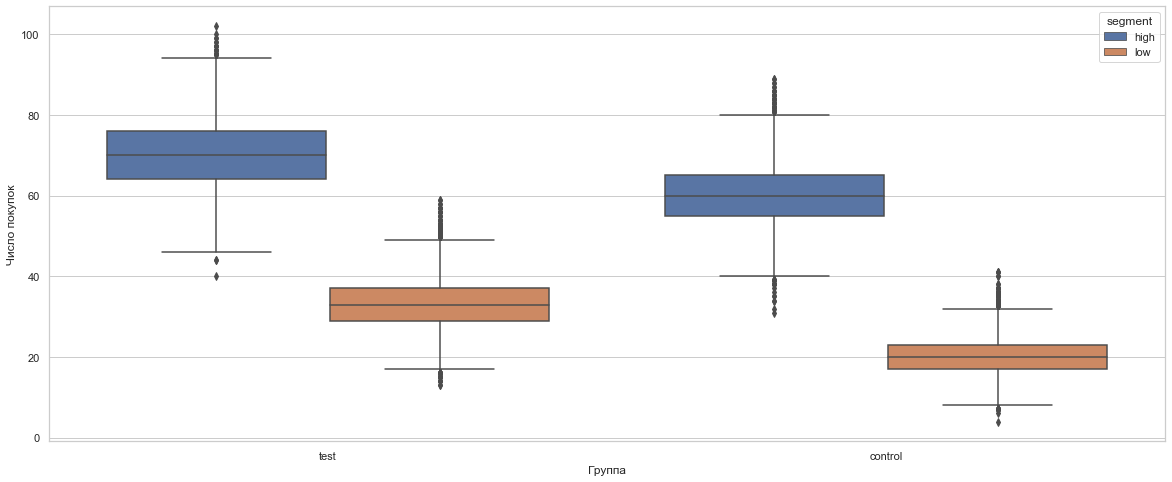

In [90]:
sns.boxplot(data=exp2, x='group', y='events', hue='segment')
plt.xlabel('Группа')
plt.ylabel('Число покупок')

Text(0, 0.5, 'Число покупок')

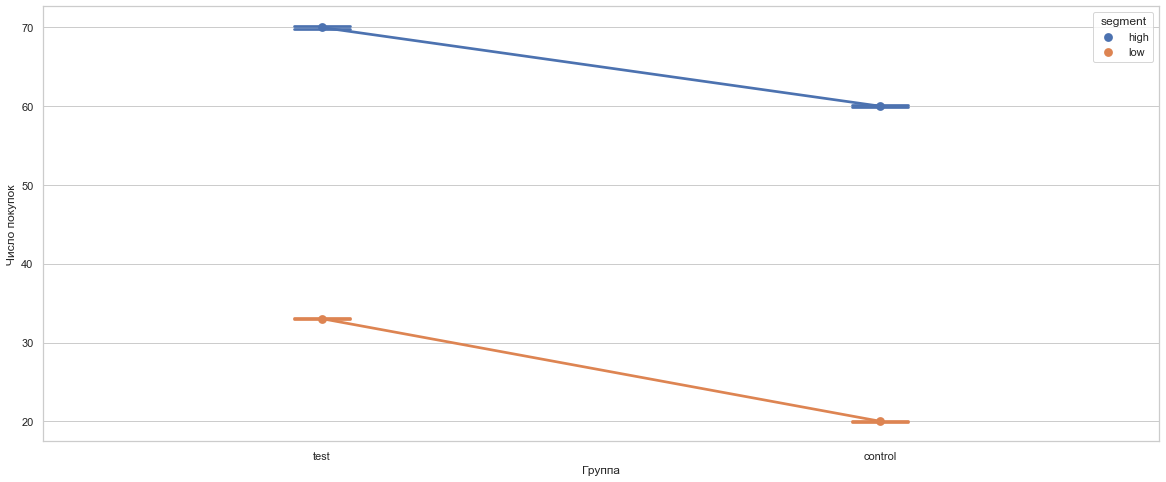

In [92]:
sns.pointplot(data=exp2, x='group', y='events', hue='segment', capsize= .1)
plt.xlabel('Группа')
plt.ylabel('Число покупок')

Фактор group оказался значимым, фактор segment – значимым, их взаимодействие – значимо.\
Судя по графику, для всех групп среднее значение events увеличилось, поэтому решение: выкатываем новую версию
